31279388c94468dcf30b518d978fdc34# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [102]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key
#from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = pd.read_csv("../output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
output_data_file 

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
...,...,...,...,...,...,...,...,...,...,...
572,572,sovetskiy,61.3614,63.5842,3.93,96,100,3.71,RU,1666108564
573,573,tatarsk,55.2190,75.9828,3.78,89,84,2.63,RU,1666108564
574,574,canchungo,12.0672,-16.0333,35.07,61,67,2.91,GW,1666108565
575,575,iquique,-20.2208,-70.1431,17.02,68,6,3.50,CL,1666108566


### Generate the Cities List by Using the `citipy` Library

In [103]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [105]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Iterate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")

for index, row in output_data_file.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        
        output_data_file.loc[index, "Country"] = weather_response["sys"]["country"]     
        output_data_file.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        output_data_file.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        output_data_file.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        output_data_file.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        output_data_file.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        output_data_file.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        output_data_file.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found. Skipping...{city}. Error: {e}")
        
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | faya.
Processing Record 1  of Set 1 | farsund.
Processing Record 2  of Set 1 | new norfolk.
Processing Record 3  of Set 1 | jamestown.
Processing Record 4  of Set 1 | lanzhou.
Processing Record 5  of Set 1 | ushuaia.
Processing Record 6  of Set 1 | albany.
Processing Record 7  of Set 1 | carnarvon.
Processing Record 8  of Set 1 | sisimiut.
Processing Record 9  of Set 1 | saint-pierre.
Processing Record 10  of Set 1 | colorado.
Processing Record 11  of Set 1 | nikolskoye.
Processing Record 12  of Set 1 | trairi.
Processing Record 13  of Set 1 | dobryanka.
Processing Record 14  of Set 1 | qaanaaq.
Processing Record 15  of Set 1 | mataura.
Processing Record 16  of Set 1 | khatanga.
Processing Record 17  of Set 1 | tasiilaq.
Processing Record 18  of Set 1 | tiksi.
Processing Record 19  of Set 1 | puerto ayora.
Processing Record 20  of Set 1 | avarua.
Processing Record 21  of Set 1 | nuevo laredo.
Process

In [78]:
city_data_df =  pd.read_csv("../output_data/cities.csv")

# Show Record Count
city_data_df.count()

City_ID       577
City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [79]:
# Display sample data
city_data_df = city_data_df.drop('City_ID', axis=1)
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [80]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [81]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

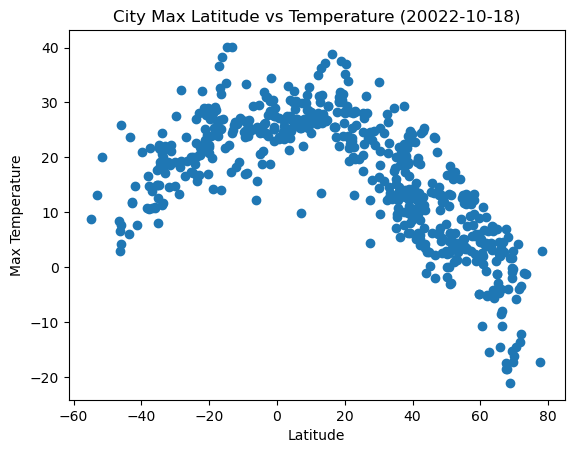

In [82]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
#plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],color = 'black' )
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs Temperature (20022-10-18)")
# Save the figure
plt.savefig("../output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

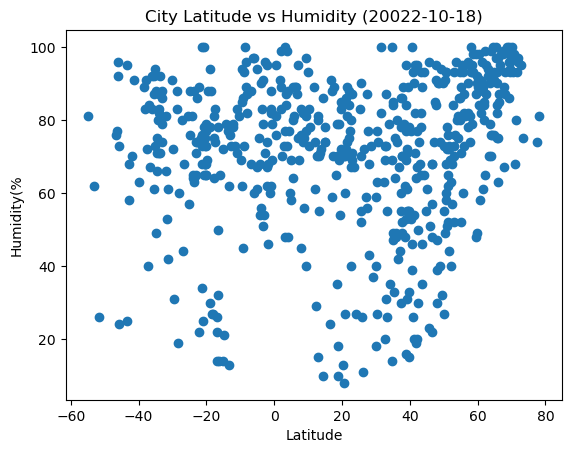

In [83]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity(%')
#plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],color = 'black' )
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Humidity (20022-10-18)")
# Save the figure
plt.savefig("../output_data/Fig1.png")
# Show plot
plt.show()
# Save the figure


#### Latitude Vs. Cloudiness

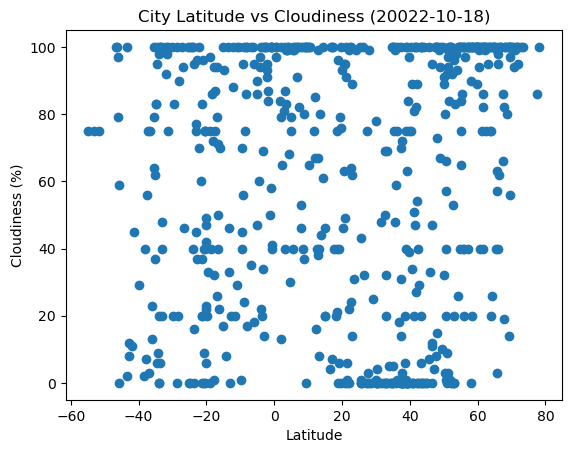

In [84]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
#plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],color = 'black' )
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Cloudiness (20022-10-18)")
# Save the figure
plt.savefig("../output_data/Fig1.png")
# Show plot
plt.show()
# Save the figure

#### Latitude vs. Wind Speed Plot

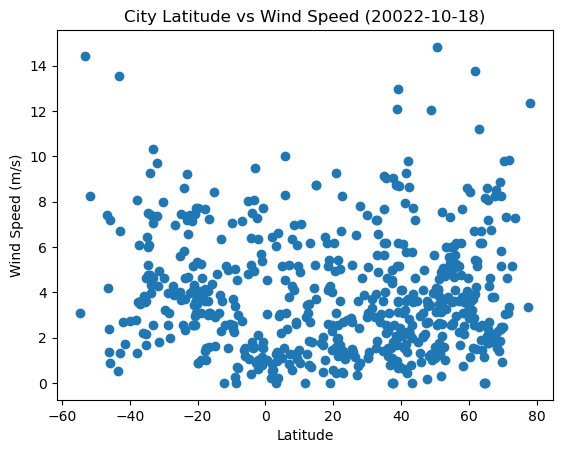

In [85]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
#plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],color = 'black' )
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Wind Speed (20022-10-18)")
# Save the figure
plt.savefig("../output_data/Fig1.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [86]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [87]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8462548186825364


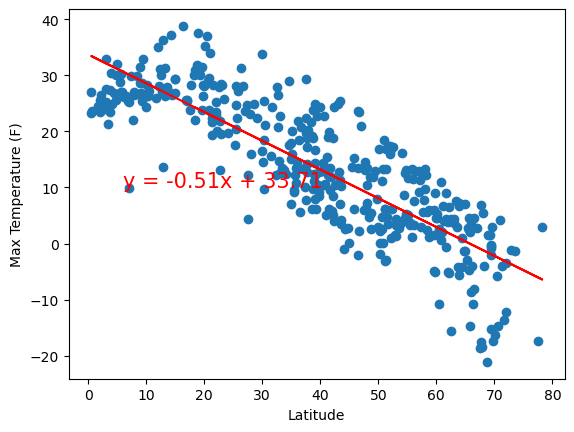

In [88]:
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Linear regression on Northern Hemisphere
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue}")
plt.show()
# YOUR CODE HERE

The r-squared is: 0.6419546065421801


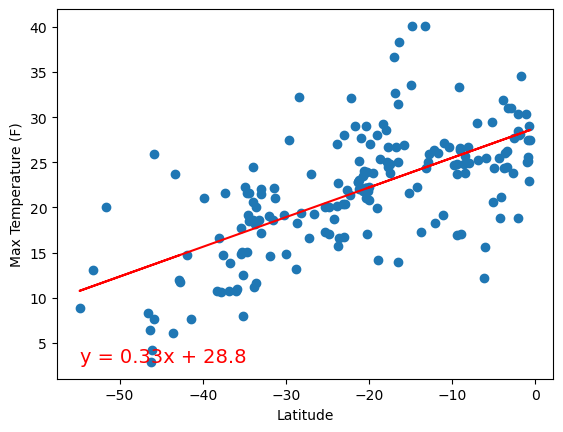

In [99]:

# Convert Latitude and Max Temp columns to numeric
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)
# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
# Annotate with the line equation
equation_position = (min(x_values), min(y_values))
plt.text(equation_position[0], equation_position[1], line_eq, fontsize=14, color="red")
# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
# Display the r-squared value
print(f"The r-squared is: {rvalue}")

# Show the plot
plt.show()


**Discussion about the linear relationship:**                                                                                                                                                              The regression displays a negative correlation,in the nothern hemisphere, as you move away from the equator the temperature decreases.                                                                      The regression displays a positive correlation, in the southern hemisphere, as you get closer to the equator the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.2385317912939407


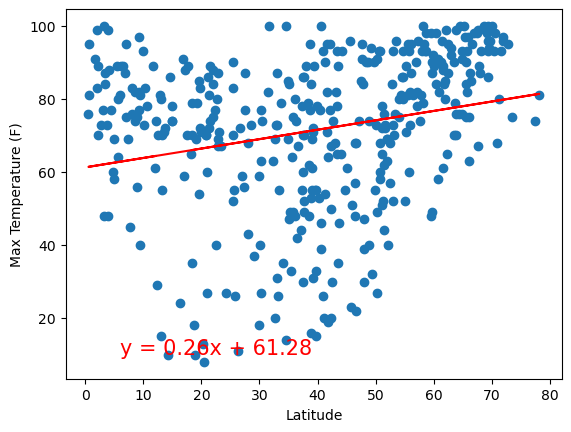

In [90]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Linear regression on Northern Hemisphere
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue}")
plt.show()
# YOUR CODE HERE

The r-squared is: 0.016759316950056818


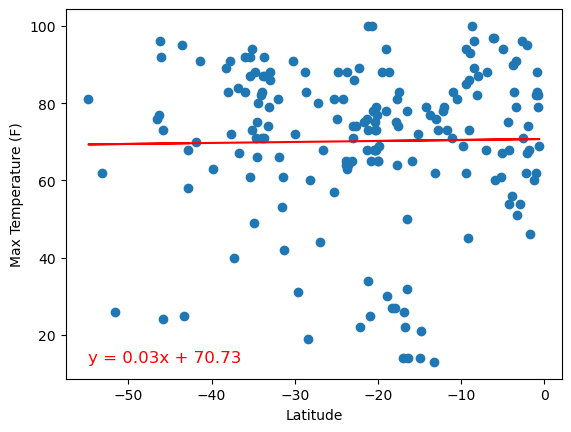

In [91]:
# Southern Hemisphere
# Convert Latitude and Max Temp columns to numeric
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)
# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
# Annotate with the line equation
equation_position = (min(x_values), min(y_values))
plt.text(equation_position[0], equation_position[1], line_eq, fontsize=12, color="red")
# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
# Display the r-squared value
print(f"The r-squared is: {rvalue}")

# Show the plot
plt.show()

**Discussion about the linear relationship: The regression does not display much of a correlation between the data sets.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.155004893876971


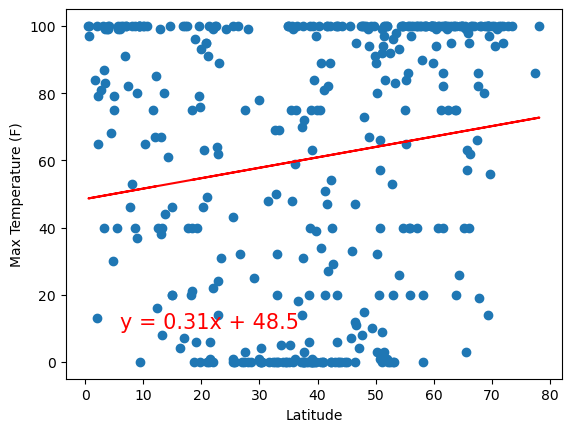

In [92]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Linear regression on Northern Hemisphere
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.14341322916643243


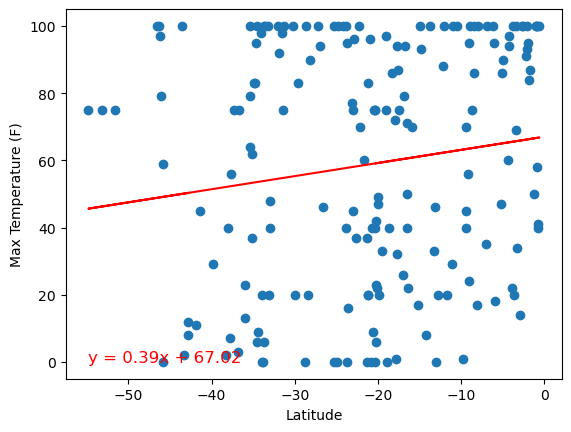

In [93]:
# Southern Hemisphere
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
# Annotate with the line equation
equation_position = (min(x_values), min(y_values))
plt.text(equation_position[0], equation_position[1], line_eq, fontsize=12, color="red")
# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
# Display the r-squared value
print(f"The r-squared is: {rvalue}")

# Show the plot
plt.show()

**Discussion about the linear relationship:The regression does not display much of a correlation between the data sets.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.1743466729090334


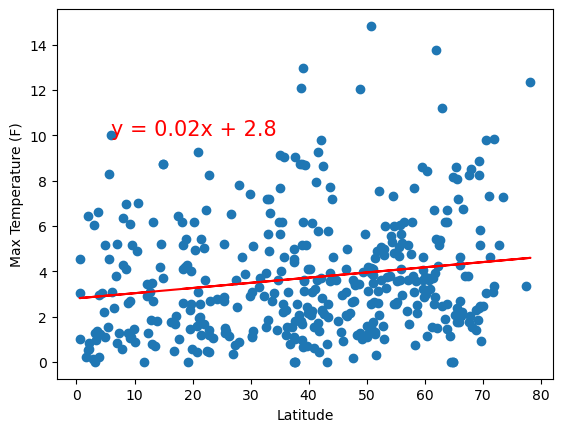

In [94]:

# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Linear regression on Northern Hemisphere
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.24947753546264592


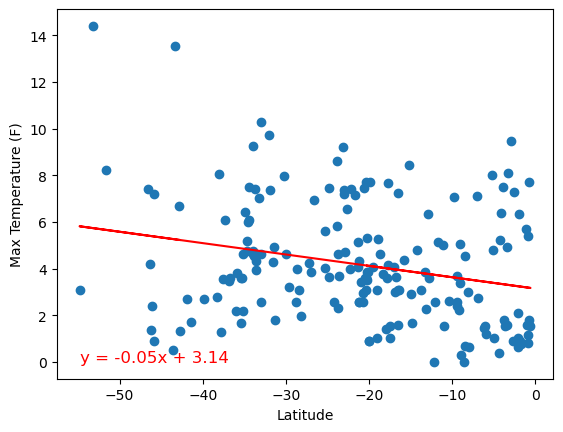

In [95]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)
# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
# Annotate with the line equation
equation_position = (min(x_values), min(y_values))
plt.text(equation_position[0], equation_position[1], line_eq, fontsize=12, color="red")
# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
# Display the r-squared value
print(f"The r-squared is: {rvalue}")

# Show the plot
plt.show()

**Discussion about the linear relationship:The regression does not display much of a correlation between the data sets.